# Bifurcation diagram of the full system with respect to $I_{\rm app}$, effect of the temperature

Model: Hu, version with slow inactivation.

Auto files: [fortran file](utils/models/hu_slow_inact/auto/hu_slow_inact.f90) and [constants](utils/models/hu_slow_inact/auto/c.hu_slow_inact).

Note: fixed points and limit cycles used as starting point for auto have been computed beforehand in [notebook](time_traces_hu_model_slow_inact.ipynb), for the different parameter sets.

In [1]:
import matplotlib.pyplot as plt
import utils.auto_helper as auto_helper
import utils.simu_helper as simu_helper
import utils.plot_helper as plot_helper

import prepare_continuation_hu_slow_inact


In [ ]:
prepare_continuation = True
compute_bd = True

### Model

In [3]:
model_name = "hu_slow_inact"
model = simu_helper.import_model(model_name)
auto_dir = auto_helper.compute_auto_dir(model_name)

### Parameter values

In [4]:
param_set_ids_default_temp = ["wt", "altered_inact_half_channels"]
param_set_ids = ["wt_high_temp", "altered_inact_half_channels_high_temp"]

i_app_val = 10


## Prepare continuation

In [5]:
if prepare_continuation:
    prepare_continuation_hu_slow_inact.compute_fp_and_lc(param_set_ids[0], None, compute_lc=False)
    prepare_continuation_hu_slow_inact.compute_fp_and_lc(param_set_ids[1], i_app_val)

## Continuation

### Branch of fixed points

In [6]:
if compute_bd:
    for param_set_id in param_set_ids:

        # parameter values
        params_simu = getattr(model, f"params_{param_set_id}")
        params = auto_helper.convert_params_dict(params_simu) 


        # 1) fixed points
        inits = auto_helper.load_fixed_point(auto_dir, param_set_id)  # starting point for auto
        auto_helper.run(filename="branch_eq", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                        ICP="IAPP", U=inits, PAR=params, UZSTOP={"IAPP": 200})
        auto_helper.run(filename="branch_eq_bwd", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                        ICP="IAPP", U=inits, PAR=params, UZSTOP={"IAPP": -50}, DS="-")
        
        # 2) limit cycles

        if param_set_id in ["wt_high_temp"]:  # continue limit cycle from Hopf

            auto_helper.run(filename="branch_lc", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                ICP=["IAPP", "PERIOD"], s="branch_eq",
                IRS="HB2", IPLT=-1, IPS=2, STOP="BP1", NTST=200)
            
        if param_set_id in ["altered_inact_half_channels_high_temp"]:  # continue limit cycle found by direct simulation
            auto_helper.run(filename="branch_lc", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                ICP=["IAPP", "PERIOD"], dat=f"lc_I_app_{i_app_val}.dat", PAR=params | {"IAPP": i_app_val},
                IPLT=-1, IPS=2, STOP="LP4", NTST=200)

gfortran -g -fopenmp -O -c hu_slow_inact.f90 -o hu_slow_inact.o
gfortran -g -fopenmp -O hu_slow_inact.o -o hu_slow_inact.exe /Users/llemaire/Documents/auto-07p/lib/*.o
Starting hu_slow_inact ...

  BR    PT  TY  LAB      IAPP        L2-NORM          V             H             N            NBIS           S            SMUT     
   1     1  EP    1   0.00000E+00   7.06025E+01  -7.05865E+01   8.67226E-01   6.39539E-01   1.78458E-02   7.42432E-01   7.42432E-01
   1   256  HB    2   1.03870E+01   5.53912E+01  -5.53797E+01   4.75628E-01   8.66160E-01   5.01604E-02   3.86504E-01   3.86504E-01
   1   318  HB    3   1.67226E+01   5.24295E+01  -5.24185E+01   3.82098E-01   8.92597E-01   6.08647E-02   3.19048E-01   3.19048E-01
   1   578  UZ    4   2.00000E+02   2.95891E+01  -2.95717E+01   3.25822E-02   9.82436E-01   2.31482E-01   4.55282E-02   4.55282E-02

 Total Time    0.220E-01
hu_slow_inact ... done
/Users/llemaire/Documents/projects/dravet/test_code/slow-nav-inactivation-in-dravet-syndrome/u

### Continue with respect to temperature

In [7]:
if compute_bd:
    param_set_id=param_set_ids_default_temp[0]
    auto_helper.run(filename="branch_hopf_wrt_temp_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_eq", IRS="HB1", ISW=2, UZSTOP={"TEMP":[0,50]}, STOP="LP1")
    auto_helper.run(filename="branch_hopf_wrt_temp", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_hopf_wrt_temp_dummy", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, STOP="LP1", DS="-", UZR={"TEMP": 20})

    auto_helper.run(filename="branch_snp_1_wrt_temp_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_lc", IRS="LP1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_1_wrt_temp_dummy_2", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_1_wrt_temp_dummy", IRS="EP1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_1_wrt_temp", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_1_wrt_temp_dummy_2", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2, DS="-")

    auto_helper.run(filename="branch_snp_2_wrt_temp_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_lc", IRS="LP3", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_2_wrt_temp_dummy_2", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_2_wrt_temp_dummy", IRS="EP1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_2_wrt_temp", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_2_wrt_temp_dummy_2", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2, DS="-")

gfortran -g -fopenmp -O -c hu_slow_inact.f90 -o hu_slow_inact.o
gfortran -g -fopenmp -O hu_slow_inact.o -o hu_slow_inact.exe /Users/llemaire/Documents/auto-07p/lib/*.o
Starting hu_slow_inact ...

  BR    PT  TY  LAB      IAPP        L2-NORM          V             H             N            NBIS           S            TEMP     
   2   624  UZ    5   5.17285E+01   4.42207E+01  -4.42095E+01   1.76804E-01   9.43078E-01   1.02042E-01   1.70930E-01   9.84095E-07

 Total Time    0.691E-01
hu_slow_inact ... done
/Users/llemaire/Documents/projects/dravet/test_code/slow-nav-inactivation-in-dravet-syndrome/utils/models/hu_slow_inact/auto/wt
Saving to b.branch_hopf_wrt_temp_dummy, s.branch_hopf_wrt_temp_dummy, and d.branch_hopf_wrt_temp_dummy ... done
Deleting fort.* *.o *.exe *.*~ ... done
Deleting fort.* *.o *.exe *.*~ ... done
Deleting fort.* *.o *.exe *.*~ ... done
gfortran -g -fopenmp -O -c hu_slow_inact.f90 -o hu_slow_inact.o
gfortran -g -fopenmp -O hu_slow_inact.o -o hu_slow_inact.exe /User

In [8]:
if compute_bd:

    # shifted voltage dependence of slow inactivation
    param_set_id = param_set_ids_default_temp[0]
    auto_helper.run(filename="branch_hopf_wrt_v_s_temp_20", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                            s="branch_hopf_wrt_temp", IRS="UZ1", ISW=2, UZSTOP={"SHIFTS":[-15]}, DS="-", PAR={"PMUT": 0.5})
    auto_helper.run(filename="branch_hopf_wrt_temp_shift_s_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                            s="branch_hopf_wrt_v_s_temp_20", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, STOP="LP1")
    auto_helper.run(filename="branch_hopf_wrt_temp_shift_s", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                            s="branch_hopf_wrt_temp_shift_s_dummy", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, STOP="LP1", DS="-")
    
    param_set_id = param_set_ids_default_temp[1]

    auto_helper.run(filename="branch_snp_1_wrt_temp_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_lc", IRS="LP1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_1_wrt_temp_dummy_2", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_1_wrt_temp_dummy", IRS="EP1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2)
    auto_helper.run(filename="branch_snp_1_wrt_temp", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "TEMP"],
                        s="branch_snp_1_wrt_temp_dummy_2", IRS="UZ1", ISW=2, UZSTOP={"TEMP":[0,50]}, IPS=2, DS="-")

gfortran -g -fopenmp -O -c hu_slow_inact.f90 -o hu_slow_inact.o
gfortran -g -fopenmp -O hu_slow_inact.o -o hu_slow_inact.exe /Users/llemaire/Documents/auto-07p/lib/*.o
Starting hu_slow_inact ...

  BR    PT  TY  LAB      IAPP        L2-NORM          V             H             N            NBIS           S           SHIFTS    
   2    69  UZ    9   3.12781E+01   4.90215E+01  -4.90114E+01   2.84857E-01   9.17171E-01   7.57110E-02   2.49953E-01  -1.50000E+01

 Total Time    0.896E-02
hu_slow_inact ... done
/Users/llemaire/Documents/projects/dravet/test_code/slow-nav-inactivation-in-dravet-syndrome/utils/models/hu_slow_inact/auto/wt
Saving to b.branch_hopf_wrt_v_s_temp_20, s.branch_hopf_wrt_v_s_temp_20, and d.branch_hopf_wrt_v_s_temp_20 ... done
Deleting fort.* *.o *.exe *.*~ ... done
Deleting fort.* *.o *.exe *.*~ ... done
Deleting fort.* *.o *.exe *.*~ ... done
gfortran -g -fopenmp -O -c hu_slow_inact.f90 -o hu_slow_inact.o
gfortran -g -fopenmp -O hu_slow_inact.o -o hu_slow_inact.exe /U

## Figures

### Bifurcation diagram with respect to the applied current

In [9]:
def plot_bd_wt(ax, variant, runs_to_plot):
    l_eq_stable, l_eq_unstable, l_lc_stable, l_lc_unstable = auto_helper.plot_bd(
        ax, auto_dir, variant, runs_to_plot, 0)
    l_hopf =auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB1", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB2", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    for fold_idx in [1, 2, 3, 4]:
        l_snp= auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC",
                                    label_legend="SNP", **auto_helper.snp_plot_args)
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC", var_idx=-1, **auto_helper.snp_plot_args)
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB1", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    return l_hopf, l_snp

In [10]:
def plot_bd_wt_high_temp(ax, variant, runs_to_plot):
    l_eq_stable, l_eq_unstable, l_lc_stable, l_lc_unstable = auto_helper.plot_bd(
        ax, auto_dir, variant, runs_to_plot, 0)
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB1", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB2", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    for fold_idx in [1, 2]:
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC",
                                    label_legend="SNP", **auto_helper.snp_plot_args)
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC", var_idx=-1, **auto_helper.snp_plot_args)

In [11]:
def plot_bd_isolas(ax, variant, runs_to_plot):
    l_eq_stable, l_eq_unstable, l_lc_stable, l_lc_unstable = auto_helper.plot_bd(
        ax, auto_dir, variant, runs_to_plot, 0)
    for fold_idx in [1, 2]:
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC",
                                    label_legend="SNP", **auto_helper.snp_plot_args)
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC", var_idx=-1, **auto_helper.snp_plot_args)    

In [12]:
def plot_bd_wrt_temp_wt(ax, param):
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param, "branch_hopf_wrt_temp", label="Hopf",  **plot_helper.hopf_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param, "branch_snp_1_wrt_temp", label="SNP",  **plot_helper.snp_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param, "branch_snp_2_wrt_temp", label="SNP",  **plot_helper.snp_branch_args)

def plot_bd_wrt_temp_mut(ax, param, param_wt=param_set_ids_default_temp[0]):
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_wt, "branch_hopf_wrt_temp_shift_s", label="Hopf",  **plot_helper.hopf_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param, "branch_snp_1_wrt_temp", label="SNP",  **plot_helper.snp_branch_args)

In [13]:
runs_to_plot = ["branch_eq", "branch_lc", "branch_eq_bwd"]

Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
figures/figure_6.eps


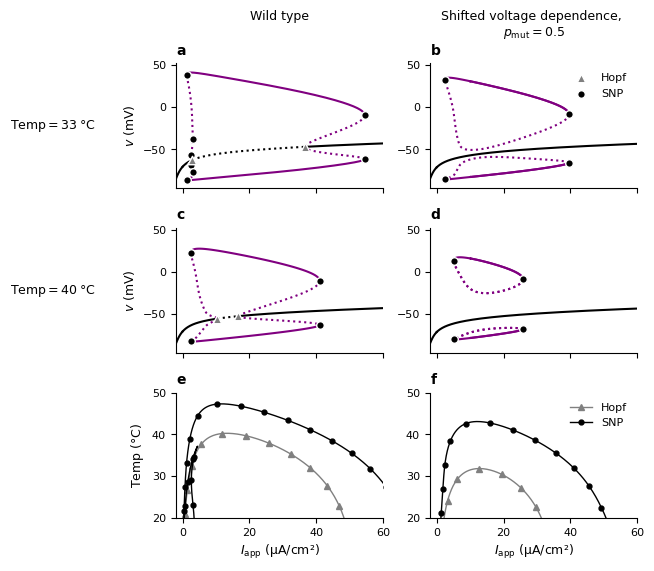

In [14]:
fig, axes = plt.subplots(3, 2, sharex=True)

# figure size
fig.set_size_inches(plot_helper.fig_size_default["width"], 5.8)

# figure layout
ax_bd_wt = axes[0,0]
ax_bd_mut =  axes[0, 1]
ax_bd_wt_high_temp = axes[1, 0]
ax_bd_mut_high_temp =  axes[1, 1]

ax_bd_wrt_temp_wt = axes[2, 0]
ax_bd_wrt_temp_mut = axes[2, 1]

plot_helper.share_axis([ax_bd_wt, ax_bd_mut, ax_bd_wt_high_temp, ax_bd_mut_high_temp], y=True)
plot_helper.share_axis([ax_bd_wrt_temp_wt, ax_bd_wrt_temp_mut], y=True)


# plot bifurcation diagrams
#### 1) default temperature
ax = ax_bd_wt
l_hopf, l_snp = plot_bd_wt(ax, param_set_ids_default_temp[0], runs_to_plot)
ax.set_xlim([-2, 60])
ax.set_ylim([-96, 52])


ax = ax_bd_mut
plot_bd_isolas(ax, param_set_ids_default_temp[1], runs_to_plot)
handles = [l_hopf, l_snp]
labels = ["Hopf", "SNP"]
ax.legend(handles, labels)

#### 2) Elevated temperature
ax = ax_bd_wt_high_temp
plot_bd_wt_high_temp(ax, param_set_ids[0], runs_to_plot)

ax = ax_bd_mut_high_temp
plot_bd_isolas(ax, param_set_ids[1], runs_to_plot)

# column and row titles
my_font_size=9
ax_bd_wt.set_title(r"Wild type", fontsize=my_font_size, y=1.28)

ax_bd_mut.set_title("Shifted voltage dependence, \n"+r"$p_{\rm mut}=0.5$", fontsize=my_font_size, y=1.15)
plot_helper.annotate_blended(ax_bd_wt,"${\\rm Temp}=33\:\degree$C", [-0.8, 0.5], rotation=0, va="center", fontsize=my_font_size)
plot_helper.annotate_blended(ax_bd_wt_high_temp,"${\\rm Temp}=40\:\degree$C", [-0.8, 0.5], rotation=0, va="center", fontsize=my_font_size)

# bd wrt i_app and temperature
ax = ax_bd_wrt_temp_wt
plot_bd_wrt_temp_wt(ax, param_set_ids_default_temp[0])
ax.set_ylim([20, 50])
ax.set_ylabel("Temp ($\degree$C)")

ax = ax_bd_wrt_temp_mut
plot_bd_wrt_temp_mut(ax, param_set_ids_default_temp[1])
ax.legend()


# axes settings
for ax in [ax_bd_wt, ax_bd_wt_high_temp]:
    ax.set_ylabel(r"$v$ (mV)")
for ax in [ax_bd_wrt_temp_wt, ax_bd_wrt_temp_mut]:
    ax.set_xlabel(r"$I_{\rm app}$"+u" (\u00B5A/cm\u00B2)")

# beautify
for ax in fig.axes:
    ax.spines[['right', 'top']].set_visible(False)
plot_helper.lettering(fig, pos=[0, 1.07], labels=["a", "b", "c", "d", "e", "f"])
fig.tight_layout()

# save figure
fig_dir = plot_helper.fig_dir
fig_path = f'{fig_dir}/figure_6.eps'
print(fig_path)
plt.savefig(fig_path, format='eps') 